In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Example 3.3

Let us choose $n=3$ and $\Delta x = 1$. Then,

\begin{align}
    \hat{x}^2 = \frac{63}{12} + \mathbb{1}\otimes Z \otimes Z  + 2 Z \otimes \mathbb{1} \otimes Z  + 4 Z \otimes Z \otimes \mathbb{1},
\end{align}

and the evolution operator

\begin{align}
    \hat{U}(t)\equiv e^{-\frac{i}{2}\hat{x}^2 t} = e^{-i\frac{63}{24}t}
    e^{-\frac{i}{2}t\mathbb{1}\otimes Z \otimes Z}
    e^{-\frac{i}{2}2tZ \otimes \mathbb{1} \otimes Z}
    e^{-\frac{i}{2}4tZ \otimes Z \otimes \mathbb{1}}.
\end{align}

In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator
import numpy as np
import matplotlib.pyplot as plt

## Direct exponentiation

In [2]:
def xhat(N, dx):
    xs = [(-0.5*(N-1) + i)*dx for i in range(N)]
    return np.diag(xs)

def phat(N, dx):
    phat = np.zeros([N,N], complex)
    for k in range(N):
        p = 2.0*np.pi*(-0.5*N + k)/4.0
        pk = np.array([ np.exp(1.0j*2.0*np.pi*(-0.5*N + k)*(-0.5*N + i)/N) for i in range(N)])/np.sqrt(N)
        phat += p*np.kron(pk.reshape([N,1]), np.conj(pk))
    return phat

In [64]:
xhat(L, 1)

array([[-3.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -2.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -1.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  2.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  3.5]])

In [8]:
from scipy.linalg import expm
L = 8
Ud = expm(-0.5j*xhat(L, 1)@xhat(L, 1))
Ud

array([[ 0.98751477+0.15752643j,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        , -0.99986235-0.01659189j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.43117652-0.90226759j,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.99219767-0.12467473j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0

## Circuit

In [9]:
def ZZ_decomp(th):
    """
    Implements the unitary U = exp(-0.5i * th * Z ⊗ Z).
    
    Parameters:
        th (float): The rotation angle θ.
    
    Returns:
        QuantumCircuit: The 2-qubit quantum circuit implementing the unitary.
    """
    # Create a 2-qubit quantum circuit with a custom name
    zz = QuantumCircuit(2, name=r'$e^{-\frac{i}{2}t Z\otimes Z}$')
    
    # Apply the decomposition
    zz.cx(1, 0)
    zz.rz(th, 0)  # Apply RZ gate with angle θ
    zz.cx(1, 0)
    
    return zz

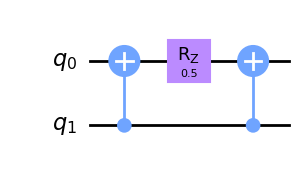

In [10]:
ZZ_decomp(0.5).draw('mpl')

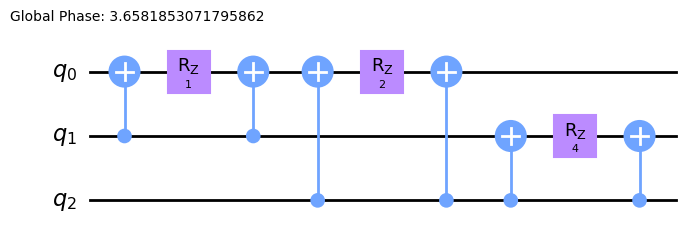

In [11]:
th = 1.0
n = 3
qc = QuantumCircuit(n)
qc.global_phase = -(4**n-1.0)/24.0

# Apply the decomposition
qc.cx(1, 0)
qc.rz(th, 0)  # Apply RZ gate with angle θ
qc.cx(1, 0)

qc.cx(2, 0)
qc.rz(2.0*th, 0)  # Apply RZ gate with angle θ
qc.cx(2, 0)

qc.cx(2, 1)
qc.rz(4.0*th, 1)  # Apply RZ gate with angle θ
qc.cx(2, 1)

qc.draw('mpl')

In [6]:
qc.draw('mpl').savefig("circuit_x2.pdf")

In [12]:
np.abs(Operator(qc).data - Ud)< 1e-15

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

Checked!

# Exmaple 3.4

In [14]:
L = 4 # 2^n
Ud = expm(-0.5j*xhat(L, 1)@xhat(L, 1))
Ukin = expm(-0.5j*phat(L, 1)@phat(L, 1))
Ud

array([[0.43117652-0.90226759j, 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.99219767-0.12467473j,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.99219767-0.12467473j, 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.43117652-0.90226759j]])

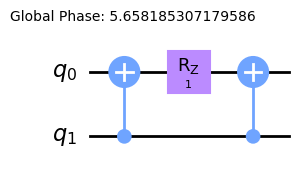

In [15]:
th = 1.0
n = 2
qc = QuantumCircuit(n)
qc.global_phase = -(4**n-1.0)/24.0

# Apply the decomposition
qc.cx(1, 0)
qc.rz(th, 0)  # Apply RZ gate with angle θ
qc.cx(1, 0)

qc.draw('mpl')

In [16]:
np.abs(Operator(qc).data - Ud)< 1e-15

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [86]:
L = 2**n
delta = np.pi*(L-1)/L

In [85]:
delta

2.356194490192345

In [17]:
def UQFT():
    qc = QuantumCircuit(2, name='QFT')

    qc.h(1)
    qc.cs(0,1)
    qc.h(0)
    qc.swap(0,1)
    display(qc.draw('mpl'))

    return qc.to_instruction()

In [18]:
def UQFTd():
    """
    UQFT^\dagger
    """
    qc = QuantumCircuit(2, name='QFT^+')

    qc.swap(0,1)
    qc.h(0)
    qc.cs(0,1)
    qc.cz(0,1)
    qc.h(1)

    display(qc.draw('mpl'))

    return qc.to_instruction()

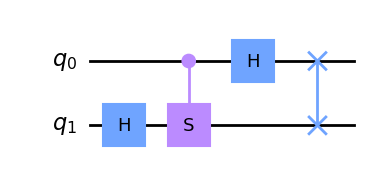

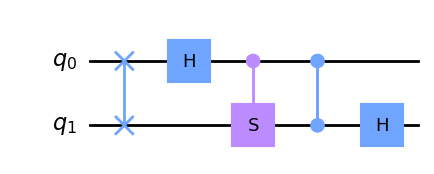

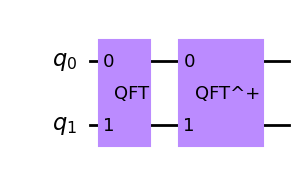

In [21]:
qc = QuantumCircuit(2)
qft = UQFT()
qftd = UQFTd()

qc.append(qft, [0, 1])
qc.append(qftd, [0, 1])


qc.draw('mpl')

In [22]:
Operator(qc)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

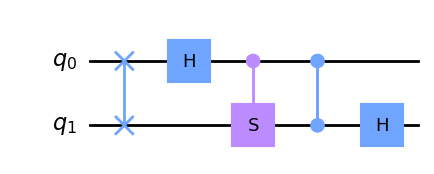

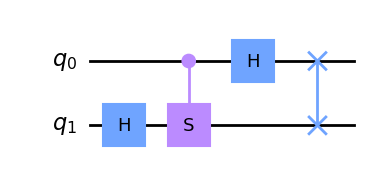

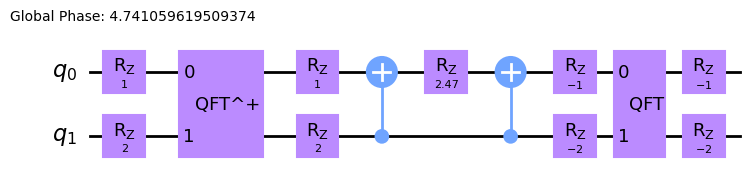

In [27]:
delta = 1.0
n = 2
th = 1.0

qc = QuantumCircuit(2)

for i in range(n):
    qc.rz(2**i*delta, i)

qftd = UQFTd()

qc.append(qftd, [0, 1])

for i in range(n):
    qc.rz(2**i*delta, i)

L = 2**n
mu = 2.0*np.pi/L #dx=1

qc.global_phase = -(4**n-1.0)*mu*mu/24.0

# Apply the decomposition
qc.cx(1, 0)
qc.rz(th*mu*mu, 0)  # Apply RZ gate with angle θ
qc.cx(1, 0)

for i in range(n):
    qc.rz(-2**i*delta, i)

# QFT
qft = UQFT()
qc.append(qft, [0, 1])

for i in range(n):
    qc.rz(-2**i*delta, i)

qc.draw('mpl')

In [28]:
Operator(qc) - Ukin

Operator([[-0.46103842-0.10259418j, -0.03411228-0.40381924j,
           -0.13977215-0.7157016j ,  0.22083021-0.27818255j],
          [-0.07149384+0.89965084j, -0.46103842-0.10259418j,
           -0.03411228-0.40381924j, -0.13977215-0.7157016j ],
          [-0.13977215-0.7157016j , -0.07149384+0.89965084j,
           -0.46103842-0.10259418j, -0.03411228-0.40381924j],
          [ 0.19022985+0.78883136j, -0.13977215-0.7157016j ,
           -0.07149384+0.89965084j, -0.46103842-0.10259418j]],
         input_dims=(2, 2), output_dims=(2, 2))

# Exmaple 3.5

In [2]:
L = 6.0
def phat(N):
    phat = np.zeros([N,N], complex)
    dx = 6.0/N
    for k in range(N):
        p = 2.0*np.pi*(-0.5*N + k)/4.0
        pk = np.array([ np.exp(1.0j*2.0*np.pi*(-0.5*N + k)*(-0.5*N + i)/N) for i in range(N)])/np.sqrt(N)
        phat += p*np.kron(pk.reshape([N,1]), np.conj(pk))
    return phat

def xhat(N):
    dx = 4.0/N
    xs = [(-0.5*(N-1) + i)*dx for i in range(N)]
    return np.diag(xs)

In [23]:
def xEig(n, ls):
    return -0.5*(2**n - 1) + np.array([ ls[l]*2**(n-1-l) for l in range(len(ls))]).sum(), np.array([- 2**(n-1)*2**(-i-1)*(-1.0)**ls[i] for i in range(n)]).sum()

In [26]:
xEig(4, [0, 0, 1, 0])

(-5.5, -5.5)

In [10]:
(2**4-1)/2

7.5

In [10]:
pm = phat(4)
xm = xhat(4)

In [15]:
H = 0.5*(pm@pm+xm@xm)

In [16]:
eigenvalues, eigenvectors = np.linalg.eig(H)

In [17]:
eigenvalues.sort()

In [18]:
eigenvalues

array([0.46679843-1.3780780e-32j, 1.73370055+0.0000000e+00j,
       2.34842291+1.4025793e-32j, 5.85328141-2.4501298e-34j])